# Introduction

For this guided project, we'll be looking at [the Medical Cost Data Set from Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download). This dataset contains information on individual medical insurance bills. Each bill is associated with some demographic and personal characteristics of the person who received it.

For our regression problem, we're interested in how these different characteristics relate to the total medical cost. It's a continuous, positive number, which makes it a good candidate for a linear regression. For this guided project, we want to construct the best possible predictive model for the cost, given some information about the patient. Predicting medical costs is an important task because it allows hospitals to predict revenue and plan necessary procedures needed by its patient population.

* [Introduction](#introduction)
* [Data Cleaning](#data-cleaning)
* [Choosing Features](#choosing-features)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')
df_c = df.copy()

In [48]:
df_c.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [49]:
print(df_c['region'].value_counts())
print('\n')
print(df_c.info())

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


## Data Cleaning

* We don't have duplicate values.
* Categorical variable `sex` will be: male = 1; female = 0
* Categorical variable `smoker` will be: yes = 1; no = 0

In [50]:
df_c['sex'] = np.where(df_c['sex'] == 'male', 1, 0)
df_c['smoker'] = np.where(df_c['smoker'] == 'yes', 1, 0)
df_c['log_charges'] = np.log(df_c['charges'])

In [51]:
df_c.head(3)

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.90,0,1,southwest,16884.9240,9.734176
1,18,1,33.77,1,0,southeast,1725.5523,7.453302
2,28,1,33.00,3,0,southeast,4449.4620,8.400538


## Choosing features



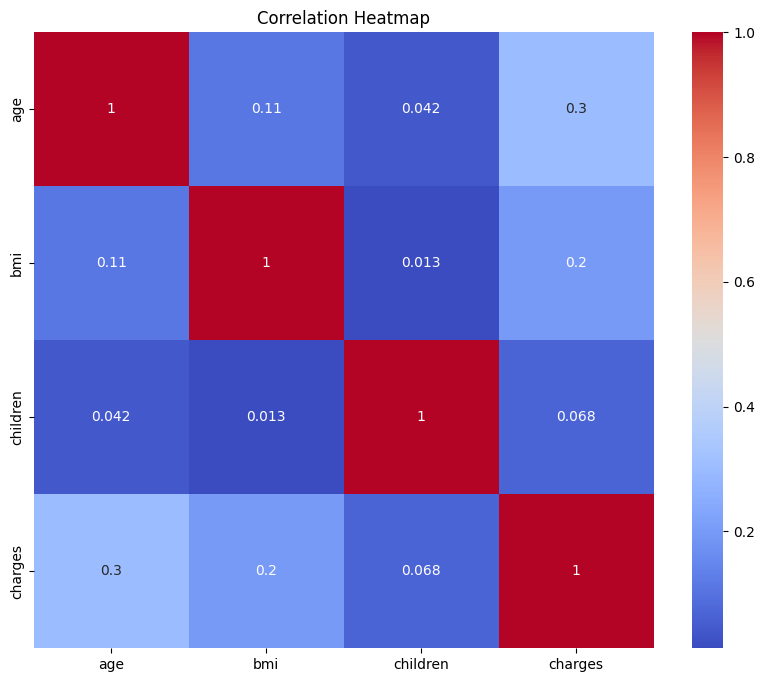

In [52]:
numeric_columns = df.select_dtypes(include=[np.number]).columns #Filtering for numeric columns in the initial df, because the cleaned one is already with dummy variables
correlations = df_c[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**top 3 correlation with charges by absolute value**



1.   Age
2.   BMI (Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women.)
3.   Children

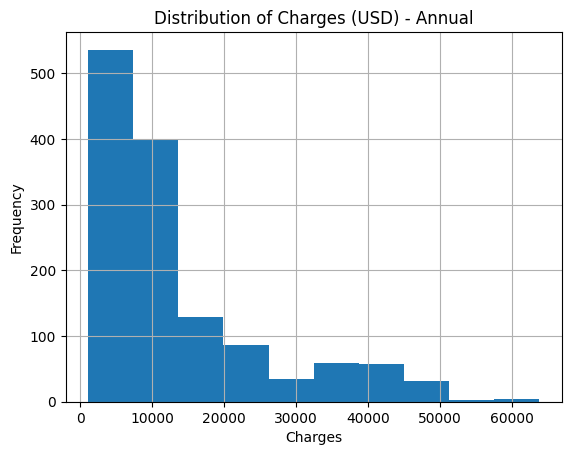

In [53]:
df_c['charges'].hist()
plt.title('Distribution of Charges (USD) - Annual')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

`Charges` show a skewed distribution, thats not the best for out analysis. Below, I do try the same with `log charges` and the distribution apper more like a norma distribution.

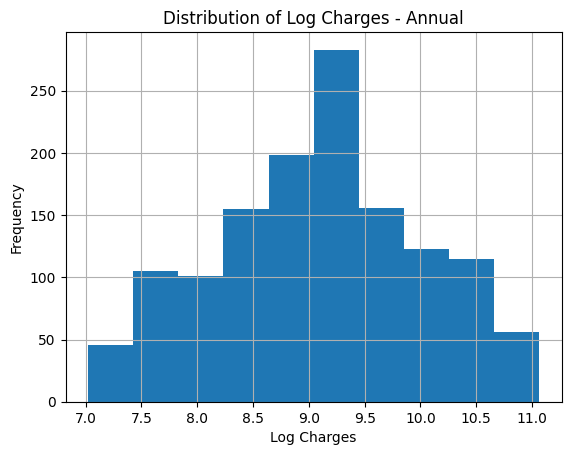

In [54]:
df_c['log_charges'].hist()
plt.title('Distribution of Log Charges - Annual')
plt.xlabel('Log Charges')
plt.ylabel('Frequency')
plt.show()

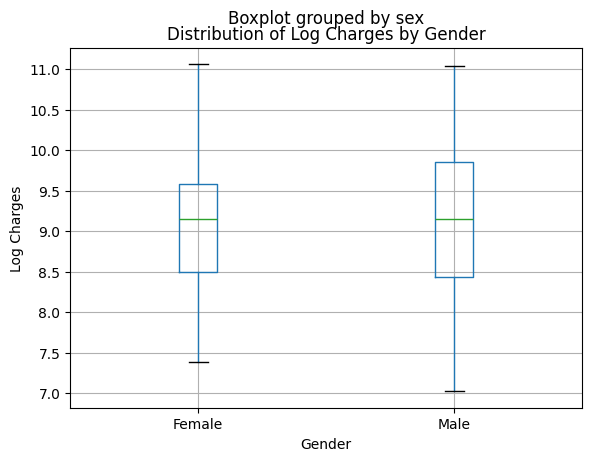

In [55]:
df_c.boxplot(column = ["log_charges"], by = "sex")
plt.xticks([1, 2], ['Female', 'Male'])
plt.title('Distribution of Log Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Log Charges')
plt.show()

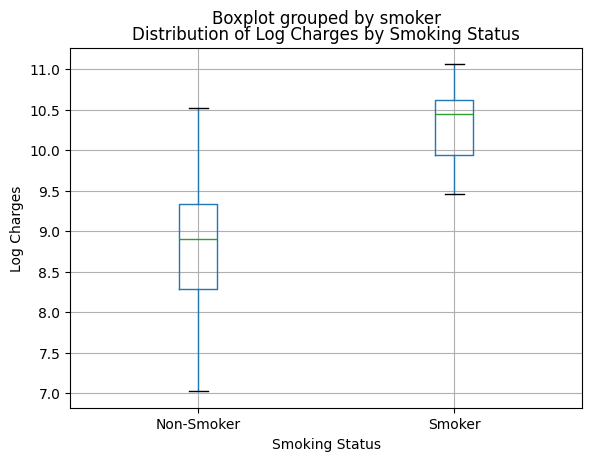

In [56]:
df_c.boxplot(column = ["log_charges"], by = "smoker")
plt.xticks([1, 2], ['Non-Smoker', 'Smoker'])
plt.title('Distribution of Log Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Log Charges')
plt.show()

<Axes: title={'center': 'log_charges'}, xlabel='region'>

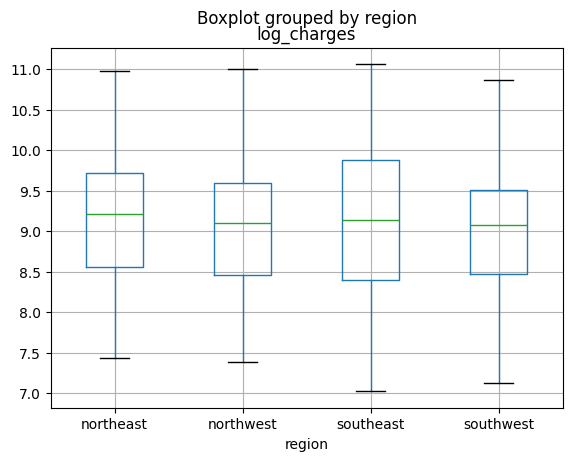

In [57]:
df_c.boxplot(column = ["log_charges"], by = "region")

Man show a wider distribution of charges and an insignificant higher standard. Smokers clearly show an average higher expense for insurance companies.Region don't appear to show an high influence on log_charges.

**Choosen Features:** Features with high correlation with `charges` or that their variables have significant different results related to `charges`. All of then show logic to increase or decrese the costs of an insurance company, for example, an older person in variable `age` tends to have higher claims in the insurance plan.


*   `Age`
*   `BMI`
*   `Children`
*   `Sex`
*   `Smoker`



In [58]:
choosen_features = ['age', 'bmi', 'children', 'sex', 'smoker']
df_choosen = df_c[choosen_features + ['charges', 'log_charges']]

## Separating Training and Testing Data

In [59]:
X = df_choosen.drop(['charges', 'log_charges'], axis=1)
y = df_choosen['log_charges']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

## Building Predictive Linear Model





1.   Do the coefficient values make sense considering their correlation with the outcome?
2.   What does the coefficient of determination suggest about the model fit?
3.   How well does the model predict the medical costs in the training set?



In [61]:
# Applying a Linear Regression Model, because it seens as a good fit to the data
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_train)
coefficients_train = model.coef_
print(f'Coefficients:{coefficients_train}') # to remember: Features order: 'age', 'bmi', 'children', 'sex', 'smoker'
r2_train = r2_score(y_train, prediction)
print(f'R^2: {r2_train}')
mse_train = mean_squared_error(y_train, prediction) # MSE on the log scale for the insurance charges
print(f'MSE {mse_train}')

print(f'MSE Original Scale {np.exp(mean_squared_error(y_train, prediction))}') # MSE on the original scale for the insurance charges

Coefficients:[ 0.03573017  0.00862047  0.10406725 -0.10679696  1.56604559]
R^2: 0.7696423635790733
MSE 0.19719527160501168
MSE Original Scale 1.2179818547576406


**Question answers**



1.   I expected a higher coefficient for `sex` considering its high correlation with `charges`. Also, BMI apparently was expected a higher coefficient. For example, I couldn't expect that `children` would cause more impact in `charges` then BMI.
Another surprise was that male health plans are cheaper. In my mind, I thought male were unhealthier and this would cause a higher average expense.
Smoker is clearly the most impactful feature (makes sense).
2.   We've got a high r^2 in this model. So, initially, the model is a good fit.
3.   The model predict 76% of the medical costs in the training set.



## Residual Diagnostics

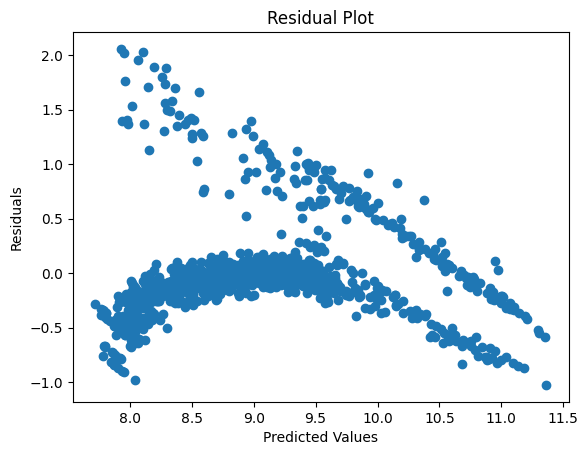

In [62]:
residuals = y_train - prediction
plt.scatter(prediction, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

* The majority of residuals is close to 0. **Lower predicted values tends to underestimate the `charges`**

As fitted values get larger, the residuals trend downward. We expect an even band, centered around zero. This does not necessarily make the model predictions unusable, but it puts into question the linear regression assumptions.

In [63]:
intercept = model.intercept_
print(f'Intercept log: {intercept}')
intercept_original = np.exp(intercept)
print(f'Intercept original: {intercept_original}')

Intercept log: 7.048048157494549
Intercept original: 1150.6107386751103


The intercept shows that without any tuning, the most basic client has a cost of 7 in log charges in the model. And $1150 dollars (annual) in original scale.



## Testing the Model on Test Data

In [64]:
model.fit(X_test,y_test)
test_prediction = model.predict(X_test)
coefficients_test = model.coef_
print(f'Coefficients:{coefficients_test}') # to remember: Features order: 'age', 'bmi', 'children', 'sex', 'smoker'
r2_test = r2_score(y_test, test_prediction)
print(f'R^2: {r2_test}')
mse_test = mean_squared_error(y_test, test_prediction) # MSE on the log scale for the insurance charges
print(f'MSE {mse_test}')

print(f'MSE Original Scale {np.exp(mean_squared_error(y_test, test_prediction))}') # MSE on the original scale for the insurance charges

Coefficients:[0.03093381 0.01981721 0.09914957 0.05506171 1.47367065]
R^2: 0.7541083422492671
MSE 0.19538245317475755
MSE Original Scale 1.2157758749281944


In the training set, the coefficients were:
* Age = 0.03573017;  
* BMI = 0.00862047;  
* Children = 0.10406725;  
* Sex = -0.10679696;  
* Smoker = 1.56604559

In this way, our test prediction got almost the same r^2, but shows different coefficients. For example, in the test set, `BMI` shows a really higher impact and the gender variable `sex`now shows a positive impact in charges for being male.

## Conclusion

The model performs reasonably well, explaining ~75% of the variance in the log-transformed charges. While the predictions are useful for understanding general trends and policy pricing, the MSE indicates room for improvement, particularly when the accuracy of individual predictions is essential. Further refinement with additional features or advanced modeling techniques could enhance its predictive power.

The MSE indicates the model’s prediction error in dollars. A value of $1,215.76 could be the difference between profit of lost for a plan.